# Steepest Descent Example 

This example was adapted from Andreas Kloeckner's example (Associate Professor CS UIUC)

Let's start with importing all the required python packages. You need to have those installed in your machine or you can proceed with running this code in Binder.

In [1]:
import numpy as np
import numpy.linalg as la

import scipy.optimize as sopt

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

We are going to work with a 2D quadratic problem. The function that we are interested in minimizing is the following:

$f(x_1,x_2)=\frac{1}{2}x_1^2 +\frac{5}{2}x_2^2$

We go ahead and define the function and its first order derivative as $f(x)$ and $df(x)$:

In [2]:
def f(x):
    return 0.5*x[0]**2 + 2.5*x[1]**2

def df(x):
    return np.array([x[0], 5*x[1]])

Let's plot the function in 3D, as follows:

Text(0.5, 0, '$f(x)$')

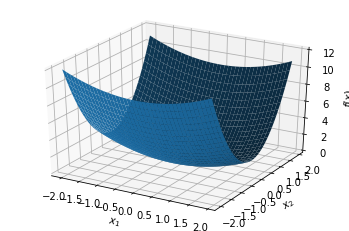

In [3]:
fig = plt.figure()
ax = fig.gca(projection="3d")

xmesh, ymesh = np.mgrid[-2:2:0.1,-2:2:0.1]
fmesh = f(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x)$')

And then as a "contour plot":

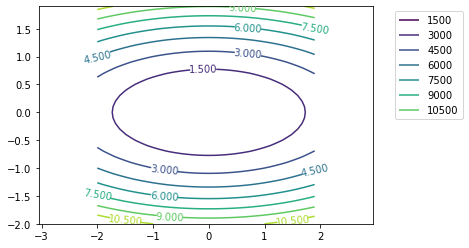

In [4]:
plt.axis("equal")
cs=plt.contour(xmesh, ymesh, fmesh)
plt.clabel(cs,inline=1,fontsize=10)
labels=['1500','3000','4500','6000','7500','9000','10500']
for i in range(len(labels)):
    cs.collections[i].set_label(labels[i])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Next, initialize steepest descent with a starting guess point:

In [5]:
guesses = [np.array([2, 2./5])]

Next, run the steepest descent algorithm. Note that sopt.golden() returns the minimum of a function of one variable using the golden section method. Please rerun this piece of code for every iteration.

In [22]:
x = guesses[-1]
s = -df(x)

#objective function that we are aiming to minimize to determine optimal step size
def f1d(alpha):
    return f(x + alpha*s)

alpha_opt = sopt.golden(f1d) #here you call the golden section method to determine the step size a
next_guess = x + alpha_opt * s
guesses.append(next_guess)

print(next_guess)

[ 0.05202459 -0.01040492]


The following graph illustrates how we move closer to the solution at each iteration. Please rerun it after each iteration to see the path followed to the approximate solution.

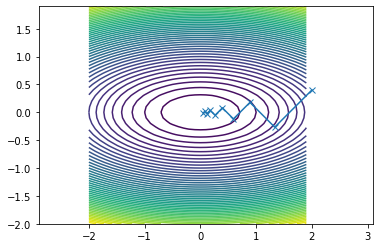

In [23]:
plt.axis("equal")
plt.contour(xmesh, ymesh, fmesh, 50)
it_array = np.array(guesses)
plt.plot(it_array.T[0], it_array.T[1], "x-")